# Trabalhando com planilhas no pandas
### Desafio de Projeto - DIO
**Autor:** *Yuri Melo* 

In [1]:
#importando pandas
import pandas as pd

In [2]:
#importando dados
df1 = pd.read_excel("C:/Users/meloy/Documents/PROJETOS_GIT/python-ds/PYTHON-DS/desafio-projeto1/datasets/Aracaju.xlsx")
df2 = pd.read_excel("C:/Users/meloy/Documents/PROJETOS_GIT/python-ds/PYTHON-DS/desafio-projeto1/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("C:/Users/meloy/Documents/PROJETOS_GIT/python-ds/PYTHON-DS/desafio-projeto1/datasets/Natal.xlsx")
df4 = pd.read_excel("C:/Users/meloy/Documents/PROJETOS_GIT/python-ds/PYTHON-DS/desafio-projeto1/datasets/Recife.xlsx")
df5 = pd.read_excel("C:/Users/meloy/Documents/PROJETOS_GIT/python-ds/PYTHON-DS/desafio-projeto1/datasets/Salvador.xlsx")

In [3]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
#mostrando primeiras 5 linhas do dataframe
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#alterando tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [6]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores nulos**

In [7]:
#verificando valores nulos nos dados
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [8]:
#substituindo valores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [9]:
#verificando novamente
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)

In [11]:
#apagando valores nulos com base em uma linha
df.dropna(subset=["Vendas"], inplace=True)

In [12]:
#apagando valores que estejam nulos em todas as linhas
df.dropna(how="all", inplace=True)

In [13]:
#exibindo dados 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Criando novas colunas**

In [14]:
#criando coluna receita(bruta)
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
#exibindo dados
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
#retornando maior receita
df["Receita"].max()

3544.0

In [17]:
#retornando menor receita
df["Receita"].min()

3.34

In [18]:
#pegando as três melhores receitas com nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [19]:
#pegando as três piores receitas com nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [20]:
#agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [21]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas**

In [22]:
#convertendo o tipo da coluna data para inteiro
df["Data"] = df["Data"].astype("int64")

In [23]:
#verificando o tipo de dados de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [24]:
#transformando coluna data em tipo data de novo
df["Data"] = pd.to_datetime(df["Data"])

In [25]:
#verificando o tipo de dados de cada coluna
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [26]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [28]:
#pegando amosra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
141,Recife,2019-03-02,182.75,983,8,1462.00,2019
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019
2,Natal,2019-03-11,308.00,852,3,924.00,2019
4,Salvador,2019-02-14,19.47,1037,3,58.41,2019
157,Natal,2019-01-02,150.17,1036,2,300.34,2019


In [29]:
#extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [30]:
#pegando amosra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
108,Aracaju,2018-01-01,31.94,1520,8,255.52,2018,1,1
51,Salvador,2019-01-01,13.37,1037,2,26.74,2019,1,1
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2019,1,1
139,Recife,2019-03-02,141.16,980,7,988.12,2019,3,2
17,Natal,2018-02-18,276.00,854,3,828.00,2018,2,18


In [31]:
#retornando data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [32]:
#criando coluna do trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [33]:
#pegando amosra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,trimestre_venda
65,Natal,2019-04-05,292.00,852,2,584.00,2019,4,5,2
63,Natal,2018-02-12,552.00,852,2,1104.00,2018,2,12,1
15,Recife,2019-01-01,7.45,981,2,14.90,2019,1,1,1
50,Salvador,2019-01-01,44.87,1036,3,134.61,2019,1,1,1
73,Aracaju,2018-01-01,159.78,1521,3,479.34,2018,1,1,1


**Visualização de dados**

In [34]:
#gráfico de barras
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

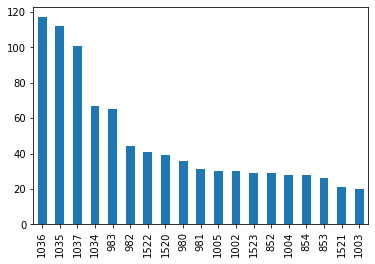

In [35]:
#grafico de barras
df["LojaID"].value_counts().plot.bar()

<AxesSubplot:>

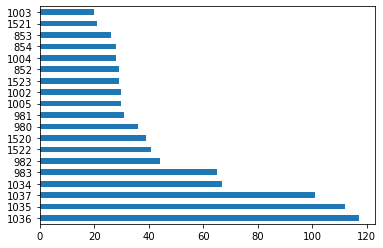

In [36]:
#grafico de barras horizontais
df["LojaID"].value_counts().plot.barh()

<AxesSubplot:>

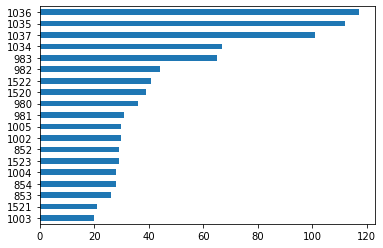

In [37]:
#grafico de barras horizontais ordenado por receita
df["LojaID"].value_counts(ascending=True).plot.barh()

<AxesSubplot:ylabel='Receita'>

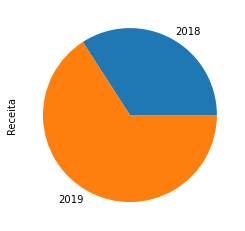

In [38]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

Text(0, 0.5, 'Total Vendas')

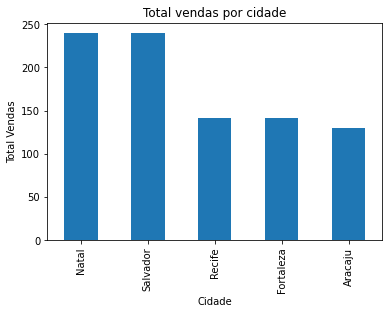

In [39]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [40]:
#alterando o estilo do grafico
plt.style.use("ggplot")

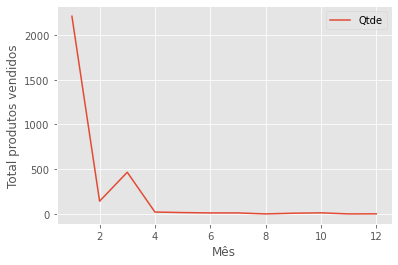

In [41]:
#plotando
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

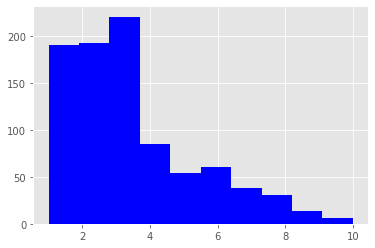

In [42]:
#plotando um histograma
plt.hist(df["Qtde"], color="blue")

In [43]:
#agrupando por ano
df_2019 = 0
df_2019 = df[df["Ano_Venda"] == 2019]

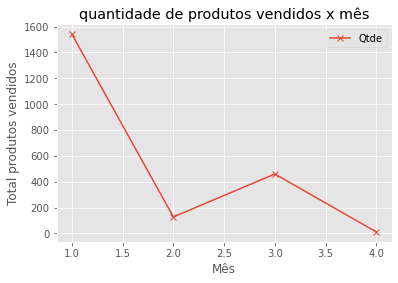

In [44]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "x")
plt.title("quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("Grafico QTDE x Mês.png")